This notebook demonstrates the usage of the Dark Inferno package

To solve the time-dependent heat equation for a DM mass of M in GeV, a heat injection H measured in TW, an initial temperature T0 K, and thermal conductivity k W/m/K, run the script darkinfernotimedependent.py with the syntax

%run darkinfernotimedependent.py Log10(M) H T0 k

For example, the syntax to run this script using M = 1 TeV, 5 TW heat injection, T0 = 5500 K, and k = 100 is given below.

As written, the script will print the time (in years) that it has reached every 500,000 years. It will run until the temperature at 400 km has reached 10^4 K. It will then print the number of years it takes to reach this temperature, and print that time to a text file. It also prints an array of times and temperatures to a different text file, titled "temperaturearray.txt". To force the script to run for an arbitrary length of time (set to 4.5 billion years near the beginning of the script), simply remove the following lines at the beginning of the for loop:

    if ualltime[int(400000/dr)]>10000:
        print("Finished")
        print("Temperature at 400 km exceeds 10000 K after "+str(i*dt/year)+" years")
        with open("timehistogram5tw.txt","a") as outfile:
            outfile.write(str(i*dt/year)+"\n")
        break

The example below should take a few minutes to run. Extending it to track the temperature profile out to 4.5 billion years may take a couple hours at the present resolution.

It is possible to change both the spatial and temporal resolution of the simulation by changing the "resfactor" variable. Increasing this variable increases both the time step and distance between grid points. It is strongly recommended that you do not change the time step and spatial resolution independently, because there is an inequality relating the spatial resolution and time step which must be satisfied in order to avoid numerical instabilities.

In [16]:
%run darkinfernotimedependent.py 3 5 5500 100

k = 100.0, T0 = 5500.0
0.0
500000.0
1000000.0
1500000.0
2000000.0
2500000.0
3000000.0
3500000.0
4000000.0
4500000.0
5000000.0
5500000.0
6000000.0
6500000.0
7000000.0
7500000.0
8000000.0
8500000.0
9000000.0
9500000.0
10000000.0
10500000.0
11000000.0
11500000.0
12000000.0
12500000.0
13000000.0
13500000.0
14000000.0
14500000.0
15000000.0
15500000.0
16000000.0
16500000.0
17000000.0
17500000.0
18000000.0
18500000.0
19000000.0
19500000.0
20000000.0
20500000.0
21000000.0
21500000.0
22000000.0
22500000.0
23000000.0
23500000.0
24000000.0
24500000.0
25000000.0
25500000.0
26000000.0
26500000.0
27000000.0
27500000.0
28000000.0
28500000.0
29000000.0
29500000.0
30000000.0
30500000.0
31000000.0
31500000.0
32000000.0
32500000.0
33000000.0
33500000.0
34000000.0
34500000.0
35000000.0
35500000.0
36000000.0
36500000.0
37000000.0
37500000.0
38000000.0
38500000.0
39000000.0
39500000.0
40000000.0
40500000.0
41000000.0
41500000.0
42000000.0
42500000.0
43000000.0
43500000.0
44000000.0
44500000.0
45000000.0
455

The following plots the temperature at 400 km as a function of time

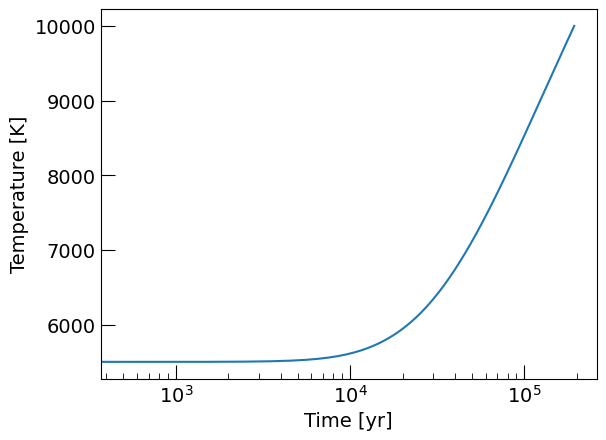

In [18]:
import matplotlib.pyplot as plt

with open("temperaturearray.txt","r") as infile:
    lines=infile.readlines()
timelist=[float(x) for x in lines[-2].split()]
templist=[float(y) for y in lines[-1].split()]

plt.tick_params(direction="in",length=10,labelsize=14)
plt.tick_params(which="minor",direction="in",length=4)
plt.xscale("log")

plt.xlabel("Time [yr]",size=14)
plt.ylabel("Temperature [K]",size=14)

plt.plot(timelist,templist)

The following cell can be uncommented in order to install sympy if necessary. This package is used in the script "darkinfernoradius.py" to solve for the radius out to which the core is melted.

In [43]:
#import sys
#!{sys.executable} -m pip install sympy

The following loop repeatedly runs the script "darkinfernoradius.py" to compute the radius out to which the core is melted. Here we loop over the values of the dark matter mass and DM-nucleon cross section, assuming T0 = 5500 K and k = 100 W/m/K. The values of T0 and k can be changed in the "darkinfernoradius.py" script. The output is saved in a text file called "parameterscan.txt". 

In [41]:
import numpy as np
for logmass in np.arange(1,5+0.01,0.1):
    for logsigma in np.arange(-40,-35+0.01,0.1):
        %run darkinfernoradius.py $logmass $logsigma

mdm = 10.0, sigma = 1e-40
mass-energy capture rate is 14806902.871613672 watts
mdm = 10.0, sigma = 1.2589254117941712e-40
mass-energy capture rate is 18641895.532246076 watts
mdm = 10.0, sigma = 1.5848931924611239e-40
mass-energy capture rate is 23470514.20742119 watts
mdm = 10.0, sigma = 1.9952623149688993e-40
mass-energy capture rate is 29550413.66937664 watts
mdm = 10.0, sigma = 2.511886431509613e-40
mass-energy capture rate is 37206184.34374757 watts
mdm = 10.0, sigma = 3.1622776601684312e-40
mass-energy capture rate is 46846813.83747914 watts
mdm = 10.0, sigma = 3.9810717055350504e-40
mass-energy capture rate is 58987746.01751463 watts
mdm = 10.0, sigma = 5.011872336272838e-40
mass-energy capture rate is 74278772.8723384 watts
mdm = 10.0, sigma = 6.3095734448020975e-40
mass-energy capture rate is 93539340.60138984 watts
mdm = 10.0, sigma = 7.943282347243048e-40
mass-energy capture rate is 117803302.83402894 watts
mdm = 10.0, sigma = 1.0000000000000327e-39
mass-energy capture rate 

Finally, the cell below produces a contour plot of the radius out to which the core is melted as a fraction of the inner core radius (1200 km). To produce a plot showing just the limit, simply comment out the "contourf" function and change the color in the line below it (otherwise it will be white on a white background).

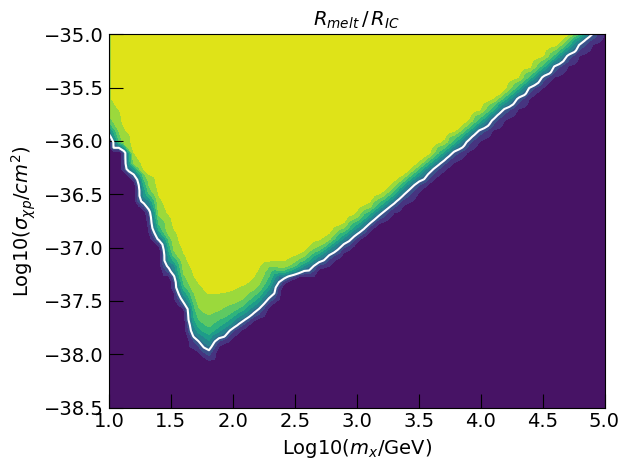

In [42]:
from scipy.interpolate import griddata

rad=[]

with open("parameterscan.txt","r") as f:
    lines=f.readlines()
for line in lines:
    input=line.split()
    if len(input)==2:
        input=inputold
    rad.append(float(input[2]))
    inputold=input

masses=np.arange(1.0,5.01,0.1)
logsigmas=np.arange(-40,-34.99,0.1)

grid_x, grid_y = np.mgrid[1:5:100j, -40:-35:100j]
points=[[[masses[i],logsigma] for logsigma in logsigmas] for i in range(len(masses))]
points = np.array([item for sublist in points for item in sublist])

grid_z2 = griddata(points, [(rad[i]/1200000) for i in range(len(rad))], (grid_x, grid_y), method='linear')

plt.contourf(grid_x,grid_y,grid_z2,levels=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
plt.contour(grid_x,grid_y,grid_z2,colors="white",levels=[0.3,1])

plt.xlim([1,5])
plt.ylim([-38.5,-35])

plt.tick_params(direction="in",length=10,labelsize=14)
plt.tick_params(which="minor",direction="in",length=4)

plt.xlabel("Log10($m_x$/GeV)",size=14)
plt.ylabel("Log10($\sigma_{\chi p}/cm^2$)",size=14)
plt.title("$R_{melt}\,/\,R_{IC}$",size=14)

plt.tight_layout()
plt.show()